In [1]:
#: Loading H2O Library

In [2]:
import h2o

In [3]:
#: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
#: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,9 hours 0 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,24 days
H2O cluster name:,H2O_from_python_avkashchauhan_1ocjkz
H2O cluster total nodes:,1
H2O cluster free memory:,3.270 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
#: Importing both training and test dataset into H2O cluster memory

In [8]:
#train_df = h2o.import_file("/Users/avkashchauhan/examples/prostate.csv")

train_df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
#: Understanding Training dataset

In [10]:
train_df.describe()

Rows:380
Cols:9




,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [11]:
#: Training dataset - columns and rows details

In [12]:
print(train_df.shape)

(380, 9)


In [13]:
#: Training  Dataframes - columns names

In [14]:
print(train_df.col_names)

[u'ID', u'CAPSULE', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [15]:
#: Training  Dataframes - columns names

In [16]:
print(train_df.columns)

[u'ID', u'CAPSULE', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [17]:
#: Training dataframes - columns by their type i.e. numeric, string, categorical(enum)

In [18]:
print(train_df.columns_by_type())

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [19]:
#: Training  dataframes - columns type as strings

In [20]:
print(train_df.columns_by_type("string"))

[]


In [21]:
#: Training  dataframes - columns type as numeric

In [22]:
print(train_df.columns_by_type("numeric"))

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]


In [23]:
#: Training  dataframes - columns type as categorical or enum

In [24]:
print(train_df.columns_by_type("categorical"))

[]


In [25]:
#: Settings response or target variable for supervised machine learning

In [26]:
response = "CAPSULE"

In [27]:
#: Understanding response variable values 

In [28]:
train_df[response].levels()

[]

In [29]:
#: Understanding response variable values as historgram in Training data

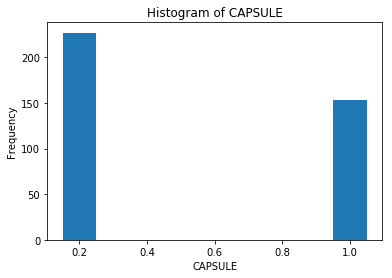

In [30]:
train_df[response].hist()

In [31]:
#: Understanding response variable values as historgram in Test data

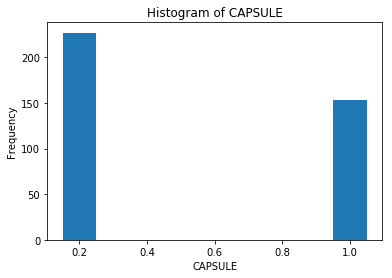

In [34]:
train_df[response].hist()

In [35]:
#: Understanding response column as dataframe

In [36]:
type(train_df[response])

h2o.frame.H2OFrame

In [38]:
#: Setting response column as factor

In [39]:
train_df[response]= train_df[response].asfactor()

In [40]:
#: Creating a list of all features we will use for machine learning

In [41]:
features = train_df.col_names
print(features)
features.remove(response)
print(features)

[u'ID', u'CAPSULE', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']
[u'ID', u'AGE', u'RACE', u'DPROS', u'DCAPS', u'PSA', u'VOL', u'GLEASON']


In [42]:
#: Importing H2O H2OGeneralizedLinearEstimator to build GLM Model

In [43]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [44]:
#: Building Gradient Boosting (GBM) - Regression model only with training dataframe

In [45]:
gbm_model_with_training_only = H2OGradientBoostingEstimator()
gbm_model_with_training_only.train(x= features, y = response, training_frame= train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
gbm_model_with_training_only

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1510608322538_111


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0637863025683
RMSE: 0.252559503025
LogLoss: 0.244491796997
Mean Per-Class Error: 0.0581900895454
AUC: 0.98825256975
Gini: 0.976505139501
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.369290229047: 


,0,1,Error,Rate
0,208.0,19.0,0.0837,(19.0/227.0)
1,5.0,148.0,0.0327,(5.0/153.0)
Total,213.0,167.0,0.0632,(24.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3692902,0.925,166.0
max f2,0.3284870,0.9554140,172.0
max f0point5,0.5709882,0.9471366,131.0
max accuracy,0.4617671,0.9368421,150.0
max precision,0.9740913,1.0,0.0
max recall,0.2716047,1.0,200.0
max specificity,0.9740913,1.0,0.0
max absolute_mcc,0.3692902,0.8731243,166.0
max min_per_class_accuracy,0.4303894,0.9295154,158.0
max mean_per_class_accuracy,0.3692902,0.9418099,166.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9656726,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9589343,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9507825,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9422672,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9301226,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.9044146,2.4836601,2.4836601,1.0,1.0,0.1241830,0.2483660,148.3660131,148.3660131
,7,0.15,0.8446853,2.4836601,2.4836601,1.0,1.0,0.1241830,0.3725490,148.3660131,148.3660131
,8,0.2,0.7961432,2.4836601,2.4836601,1.0,1.0,0.1241830,0.4967320,148.3660131,148.3660131
,9,0.3,0.6723258,2.4836601,2.4836601,1.0,1.0,0.2483660,0.7450980,148.3660131,148.3660131
,10,0.4,0.4587689,1.6993464,2.2875817,0.6842105,0.9210526,0.1699346,0.9150327,69.9346405,128.7581699



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-11-13 22:26:45,0.000 sec,0.0,0.4904278,0.6740643,0.5,1.0,0.5973684
,2017-11-13 22:26:45,0.010 sec,1.0,0.4686191,0.6307225,0.8893064,2.4836601,0.2052632
,2017-11-13 22:26:45,0.019 sec,2.0,0.4511855,0.5972755,0.8968789,2.4836601,0.1868421
,2017-11-13 22:26:45,0.032 sec,3.0,0.4364517,0.5695314,0.8989807,2.4836601,0.1815789
,2017-11-13 22:26:45,0.039 sec,4.0,0.4235059,0.5454486,0.9031845,2.4836601,0.1684211
---,---,---,---,---,---,---,---,---
,2017-11-13 22:26:45,0.292 sec,46.0,0.2607981,0.2566517,0.9857764,2.4836601,0.0631579
,2017-11-13 22:26:45,0.299 sec,47.0,0.2579166,0.2523916,0.9866690,2.4836601,0.0657895
,2017-11-13 22:26:45,0.305 sec,48.0,0.2570579,0.2508900,0.9866978,2.4836601,0.0631579
,2017-11-13 22:26:45,0.312 sec,49.0,0.2535220,0.2459155,0.9880510,2.4836601,0.0631579



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,110.3258133,1.0,0.3229987
ID,58.6968040,0.5320315,0.1718455
PSA,57.7674637,0.5236079,0.1691247
VOL,40.0885315,0.3633649,0.1173664
DPROS,34.9556313,0.3168400,0.1023389
AGE,31.4995918,0.2855142,0.0922207
DCAPS,7.1565890,0.0648678,0.0209522
RACE,1.0769546,0.0097616,0.0031530


In [47]:
#:Building Gradient Boosting (GBM) -  Regression model with cross validation

In [48]:
gbm_model_with_training_and_cv = H2OGradientBoostingEstimator(nfolds=5)
gbm_model_with_training_and_cv.train(x = features, y = response, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [49]:
gbm_model_with_training_and_cv

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1510608322538_214


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0637863025683
RMSE: 0.252559503025
LogLoss: 0.244491796997
Mean Per-Class Error: 0.0581900895454
AUC: 0.98825256975
Gini: 0.976505139501
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.369290229047: 


,0,1,Error,Rate
0,208.0,19.0,0.0837,(19.0/227.0)
1,5.0,148.0,0.0327,(5.0/153.0)
Total,213.0,167.0,0.0632,(24.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3692902,0.925,166.0
max f2,0.3284870,0.9554140,172.0
max f0point5,0.5709882,0.9471366,131.0
max accuracy,0.4617671,0.9368421,150.0
max precision,0.9740913,1.0,0.0
max recall,0.2716047,1.0,200.0
max specificity,0.9740913,1.0,0.0
max absolute_mcc,0.3692902,0.8731243,166.0
max min_per_class_accuracy,0.4303894,0.9295154,158.0
max mean_per_class_accuracy,0.3692902,0.9418099,166.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9656726,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9589343,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9507825,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9422672,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9301226,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.9044146,2.4836601,2.4836601,1.0,1.0,0.1241830,0.2483660,148.3660131,148.3660131
,7,0.15,0.8446853,2.4836601,2.4836601,1.0,1.0,0.1241830,0.3725490,148.3660131,148.3660131
,8,0.2,0.7961432,2.4836601,2.4836601,1.0,1.0,0.1241830,0.4967320,148.3660131,148.3660131
,9,0.3,0.6723258,2.4836601,2.4836601,1.0,1.0,0.2483660,0.7450980,148.3660131,148.3660131
,10,0.4,0.4587689,1.6993464,2.2875817,0.6842105,0.9210526,0.1699346,0.9150327,69.9346405,128.7581699




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.193449479928
RMSE: 0.439828921204
LogLoss: 0.583803714321
Mean Per-Class Error: 0.2749560911
AUC: 0.771385793671
Gini: 0.542771587343
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.227900946183: 


,0,1,Error,Rate
0,131.0,96.0,0.4229,(96.0/227.0)
1,21.0,132.0,0.1373,(21.0/153.0)
Total,152.0,228.0,0.3079,(117.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2279009,0.6929134,227.0
max f2,0.1465578,0.7931034,257.0
max f0point5,0.5129327,0.6620690,142.0
max accuracy,0.5129327,0.7263158,142.0
max precision,0.9811968,1.0,0.0
max recall,0.0154869,1.0,375.0
max specificity,0.9811968,1.0,0.0
max absolute_mcc,0.3624449,0.4426745,175.0
max min_per_class_accuracy,0.3805118,0.7224670,173.0
max mean_per_class_accuracy,0.3624449,0.7250439,175.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9662284,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9480133,1.8627451,2.1732026,0.75,0.875,0.0196078,0.0457516,86.2745098,117.3202614
,3,0.0315789,0.9397978,2.4836601,2.2766885,1.0,0.9166667,0.0261438,0.0718954,148.3660131,127.6688453
,4,0.0421053,0.9337589,2.4836601,2.3284314,1.0,0.9375,0.0261438,0.0980392,148.3660131,132.8431373
,5,0.05,0.9183419,1.6557734,2.2222222,0.6666667,0.8947368,0.0130719,0.1111111,65.5773420,122.2222222
,6,0.1,0.8456098,1.8300654,2.0261438,0.7368421,0.8157895,0.0915033,0.2026144,83.0065359,102.6143791
,7,0.15,0.7985739,1.4379085,1.8300654,0.5789474,0.7368421,0.0718954,0.2745098,43.7908497,83.0065359
,8,0.2,0.6954812,1.3071895,1.6993464,0.5263158,0.6842105,0.0653595,0.3398693,30.7189542,69.9346405
,9,0.3,0.5981705,1.5686275,1.6557734,0.6315789,0.6666667,0.1568627,0.4967320,56.8627451,65.5773420
,10,0.4,0.4783089,1.5686275,1.6339869,0.6315789,0.6578947,0.1568627,0.6535948,56.8627451,63.3986928



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7287913,0.0403975,0.71875,0.7228916,0.6375,0.8148148,0.75
auc,0.7700940,0.0343016,0.7761486,0.7654762,0.74,0.8565051,0.7123404
err,0.2712087,0.0403975,0.28125,0.2771084,0.3625,0.1851852,0.25
err_count,20.6,3.481379,18.0,23.0,29.0,15.0,18.0
f0point5,0.6605104,0.0457309,0.698324,0.6595745,0.5555556,0.75,0.6390978
f1,0.7086272,0.0374964,0.7352941,0.7294118,0.6419753,0.7826087,0.6538461
f2,0.7679788,0.0383096,0.7763975,0.8157895,0.7602339,0.8181818,0.6692913
lift_top_group,2.5027723,0.1947544,2.064516,2.3714285,2.6666667,2.53125,2.88
logloss,0.5868385,0.0469577,0.6350344,0.6178322,0.5942904,0.4570368,0.6299987
max_per_class_error,0.3567103,0.0683767,0.3636364,0.3958333,0.5,0.2040816,0.32


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-11-13 22:26:47,0.694 sec,0.0,0.4904278,0.6740643,0.5,1.0,0.5973684
,2017-11-13 22:26:47,0.698 sec,1.0,0.4686191,0.6307225,0.8893064,2.4836601,0.2052632
,2017-11-13 22:26:47,0.702 sec,2.0,0.4511855,0.5972755,0.8968789,2.4836601,0.1868421
,2017-11-13 22:26:47,0.705 sec,3.0,0.4364517,0.5695314,0.8989807,2.4836601,0.1815789
,2017-11-13 22:26:47,0.708 sec,4.0,0.4235059,0.5454486,0.9031845,2.4836601,0.1684211
---,---,---,---,---,---,---,---,---
,2017-11-13 22:26:47,0.929 sec,46.0,0.2607981,0.2566517,0.9857764,2.4836601,0.0631579
,2017-11-13 22:26:47,0.934 sec,47.0,0.2579166,0.2523916,0.9866690,2.4836601,0.0657895
,2017-11-13 22:26:47,0.940 sec,48.0,0.2570579,0.2508900,0.9866978,2.4836601,0.0631579
,2017-11-13 22:26:47,0.946 sec,49.0,0.2535220,0.2459155,0.9880510,2.4836601,0.0631579



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,110.3258133,1.0,0.3229987
ID,58.6968040,0.5320315,0.1718455
PSA,57.7674637,0.5236079,0.1691247
VOL,40.0885315,0.3633649,0.1173664
DPROS,34.9556313,0.3168400,0.1023389
AGE,31.4995918,0.2855142,0.0922207
DCAPS,7.1565890,0.0648678,0.0209522
RACE,1.0769546,0.0097616,0.0031530


In [50]:
#: Building Gradient Boosting (GBM) -  Regression model with training and 
#  validation data and for that reason we need to split training dataset

In [66]:
df_gbm_train, df_gbm_valid, df_gbm_test = train_df.split_frame(ratios=[0.8,0.1])

In [65]:
#: understanding the row count into original andsplit object

In [67]:
print(train_df.shape)
print(df_gbm_train.shape)
print(df_gbm_valid.shape)
print(df_gbm_test.shape)

(380, 9)
(304, 9)
(38, 9)
(38, 9)


In [54]:
#:Building Gradient Boosting (GBM) -  Regression model with training and validation data now

In [68]:
gbm_model_with_training_and_validtion = H2OGradientBoostingEstimator()
gbm_model_with_training_and_validtion.train(x = features, y = response, 
                                            training_frame=df_gbm_train, 
                                            validation_frame=df_gbm_valid,
                                           model_id = "glm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [69]:
gbm_model_with_training_and_validtion

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  glm_model_with_training_and_validtion_python


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0548119375726
RMSE: 0.234119494217
LogLoss: 0.223578775628
Mean Per-Class Error: 0.030017921147
AUC: 0.99520609319
Gini: 0.99041218638
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.433295291885: 


,0,1,Error,Rate
0,175.0,5.0,0.0278,(5.0/180.0)
1,4.0,120.0,0.0323,(4.0/124.0)
Total,179.0,125.0,0.0296,(9.0/304.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4332953,0.9638554,124.0
max f2,0.4332953,0.9661836,124.0
max f0point5,0.5733132,0.9692029,106.0
max accuracy,0.4332953,0.9703947,124.0
max precision,0.9792875,1.0,0.0
max recall,0.3123540,1.0,146.0
max specificity,0.9792875,1.0,0.0
max absolute_mcc,0.4332953,0.9388082,124.0
max min_per_class_accuracy,0.4332953,0.9677419,124.0
max mean_per_class_accuracy,0.4332953,0.9699821,124.0


Gains/Lift Table: Avg response rate: 40.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0131579,0.9628819,2.4516129,2.4516129,1.0,1.0,0.0322581,0.0322581,145.1612903,145.1612903
,2,0.0230263,0.9533590,2.4516129,2.4516129,1.0,1.0,0.0241935,0.0564516,145.1612903,145.1612903
,3,0.0328947,0.9502933,2.4516129,2.4516129,1.0,1.0,0.0241935,0.0806452,145.1612903,145.1612903
,4,0.0427632,0.9432361,2.4516129,2.4516129,1.0,1.0,0.0241935,0.1048387,145.1612903,145.1612903
,5,0.0526316,0.9418574,2.4516129,2.4516129,1.0,1.0,0.0241935,0.1290323,145.1612903,145.1612903
,6,0.1019737,0.9158052,2.4516129,2.4516129,1.0,1.0,0.1209677,0.25,145.1612903,145.1612903
,7,0.1513158,0.8692245,2.4516129,2.4516129,1.0,1.0,0.1209677,0.3709677,145.1612903,145.1612903
,8,0.2006579,0.8105281,2.4516129,2.4516129,1.0,1.0,0.1209677,0.4919355,145.1612903,145.1612903
,9,0.2993421,0.7075336,2.4516129,2.4516129,1.0,1.0,0.2419355,0.7338710,145.1612903,145.1612903
,10,0.4013158,0.4559975,2.1352758,2.3712322,0.8709677,0.9672131,0.2177419,0.9516129,113.5275754,137.1232152




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.152755729065
RMSE: 0.390839774159
LogLoss: 0.481813619133
Mean Per-Class Error: 0.196923076923
AUC: 0.809230769231
Gini: 0.618461538462
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.420686001908: 


,0,1,Error,Rate
0,19.0,6.0,0.24,(6.0/25.0)
1,2.0,11.0,0.1538,(2.0/13.0)
Total,21.0,17.0,0.2105,(8.0/38.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4206860,0.7333333,16.0
max f2,0.4206860,0.7971014,16.0
max f0point5,0.6842872,0.8108108,5.0
max accuracy,0.6842872,0.8157895,5.0
max precision,0.9709371,1.0,0.0
max recall,0.0246933,1.0,36.0
max specificity,0.9709371,1.0,0.0
max absolute_mcc,0.6842872,0.6004806,5.0
max min_per_class_accuracy,0.4559573,0.7692308,14.0
max mean_per_class_accuracy,0.4206860,0.8030769,16.0


Gains/Lift Table: Avg response rate: 34.21 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0263158,0.9671841,2.9230769,2.9230769,1.0,1.0,0.0769231,0.0769231,192.3076923,192.3076923
,2,0.0263158,0.9634310,0.0,2.9230769,0.0,1.0,0.0,0.0769231,-100.0,192.3076923
,3,0.0526316,0.9515437,2.9230769,2.9230769,1.0,1.0,0.0769231,0.1538462,192.3076923,192.3076923
,4,0.0526316,0.9204302,0.0,2.9230769,0.0,1.0,0.0,0.1538462,-100.0,192.3076923
,5,0.0526316,0.8893168,0.0,2.9230769,0.0,1.0,0.0,0.1538462,-100.0,192.3076923
,6,0.1052632,0.7978554,2.9230769,2.9230769,1.0,1.0,0.1538462,0.3076923,192.3076923,192.3076923
,7,0.1578947,0.6665591,2.9230769,2.9230769,1.0,1.0,0.1538462,0.4615385,192.3076923,192.3076923
,8,0.2105263,0.6062020,0.0,2.1923077,0.0,0.75,0.0,0.4615385,-100.0,119.2307692
,9,0.3157895,0.4972917,0.7307692,1.7051282,0.25,0.5833333,0.0769231,0.5384615,-26.9230769,70.5128205
,10,0.3947368,0.4406607,2.9230769,1.9487179,1.0,0.6666667,0.2307692,0.7692308,192.3076923,94.8717949



Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-11-13 22:27:52,0.001 sec,0.0,0.4914434,0.6760831,0.5,1.0,0.5921053,0.4789546,0.6515650,0.5,1.0,0.6578947
,2017-11-13 22:27:52,0.005 sec,1.0,0.4720114,0.6374387,0.8644041,2.4516129,0.2269737,0.4650639,0.6244840,0.78,2.9230769,0.2368421
,2017-11-13 22:27:52,0.009 sec,2.0,0.4554601,0.6056158,0.8869624,2.4516129,0.2171053,0.4488147,0.5937507,0.8246154,2.9230769,0.2105263
,2017-11-13 22:27:52,0.013 sec,3.0,0.4398059,0.5760860,0.8940412,2.4516129,0.2006579,0.4337890,0.5660393,0.8446154,2.9230769,0.1315789
,2017-11-13 22:27:52,0.016 sec,4.0,0.4278322,0.5539058,0.9040995,2.4516129,0.2039474,0.4218901,0.5441911,0.8876923,2.9230769,0.1578947
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-11-13 22:27:52,0.224 sec,46.0,0.2413698,0.2339888,0.9938620,2.4516129,0.0394737,0.3905465,0.4824366,0.8092308,2.9230769,0.2105263
,2017-11-13 22:27:52,0.230 sec,47.0,0.2398180,0.2316915,0.9942652,2.4516129,0.0361842,0.3930096,0.4865162,0.8030769,2.9230769,0.2105263
,2017-11-13 22:27:52,0.236 sec,48.0,0.2385228,0.2295585,0.9940860,2.4516129,0.0361842,0.3928504,0.4853373,0.8030769,2.9230769,0.2105263
,2017-11-13 22:27:52,0.242 sec,49.0,0.2372900,0.2277650,0.9944892,2.4516129,0.0361842,0.3919804,0.4835920,0.8030769,2.9230769,0.2105263



See the whole table with table.as_data_frame()
Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,73.4897232,1.0,0.2549634
PSA,63.4471703,0.8633475,0.2201221
ID,57.4138336,0.7812498,0.1991901
VOL,50.6388054,0.6890597,0.1756850
DPROS,24.5224018,0.3336848,0.0850774
AGE,15.4116030,0.2097110,0.0534686
DCAPS,3.1581650,0.0429742,0.0109569
RACE,0.1546198,0.0021040,0.0005364


In [70]:
#:Building Gradient Boosting (GBM) -  Regression model with training and validation data now
#  Setting key GBM parameters

In [58]:
gbm_model_with_training_cv_config = H2OGradientBoostingEstimator(distribution="AUTO",
                                      ntrees=10,
                                      max_depth=3,
                                      min_rows=2,
                                      learn_rate=0.2,
                                      nfolds=5,
                                      keep_cross_validation_predictions=True,
                                      seed=1)

In [72]:
gbm_model_with_training_cv_config.train(x = features, y = response, 
                                            training_frame=df_gbm_train, 
                                           model_id = "glm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [73]:
gbm_model_with_training_cv_config

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  glm_model_with_training_and_validtion_python


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.130611385751
RMSE: 0.361401972534
LogLoss: 0.426908083591
Mean Per-Class Error: 0.15958781362
AUC: 0.916129032258
Gini: 0.832258064516
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.501700545623: 


,0,1,Error,Rate
0,169.0,11.0,0.0611,(11.0/180.0)
1,32.0,92.0,0.2581,(32.0/124.0)
Total,201.0,103.0,0.1414,(43.0/304.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5017005,0.8105727,66.0
max f2,0.3235305,0.8536585,107.0
max f0point5,0.5017005,0.8582090,66.0
max accuracy,0.5017005,0.8585526,66.0
max precision,0.8693852,1.0,0.0
max recall,0.1944091,1.0,164.0
max specificity,0.8693852,1.0,0.0
max absolute_mcc,0.5017005,0.7069123,66.0
max min_per_class_accuracy,0.3673496,0.8166667,92.0
max mean_per_class_accuracy,0.5017005,0.8404122,66.0


Gains/Lift Table: Avg response rate: 40.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0131579,0.8443104,2.4516129,2.4516129,1.0,1.0,0.0322581,0.0322581,145.1612903,145.1612903
,2,0.0263158,0.8369140,2.4516129,2.4516129,1.0,1.0,0.0322581,0.0645161,145.1612903,145.1612903
,3,0.0328947,0.8332900,2.4516129,2.4516129,1.0,1.0,0.0161290,0.0806452,145.1612903,145.1612903
,4,0.0427632,0.8292500,2.4516129,2.4516129,1.0,1.0,0.0241935,0.1048387,145.1612903,145.1612903
,5,0.0526316,0.8234718,2.4516129,2.4516129,1.0,1.0,0.0241935,0.1290323,145.1612903,145.1612903
,6,0.1019737,0.7854583,2.4516129,2.4516129,1.0,1.0,0.1209677,0.25,145.1612903,145.1612903
,7,0.1513158,0.7274284,2.4516129,2.4516129,1.0,1.0,0.1209677,0.3709677,145.1612903,145.1612903
,8,0.2006579,0.6405118,2.1247312,2.3712322,0.8666667,0.9672131,0.1048387,0.4758065,112.4731183,137.1232152
,9,0.2993421,0.5322161,1.9612903,2.2360865,0.8,0.9120879,0.1935484,0.6693548,96.1290323,123.6086494
,10,0.4013158,0.4207128,1.1862643,1.9693284,0.4838710,0.8032787,0.1209677,0.7903226,18.6264308,96.9328398




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.194813105492
RMSE: 0.441376376228
LogLoss: 0.575641820282
Mean Per-Class Error: 0.292025089606
AUC: 0.756563620072
Gini: 0.513127240143
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.305673209134: 


,0,1,Error,Rate
0,100.0,80.0,0.4444,(80.0/180.0)
1,23.0,101.0,0.1855,(23.0/124.0)
Total,123.0,181.0,0.3388,(103.0/304.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3056732,0.6622951,158.0
max f2,0.1501359,0.7922078,235.0
max f0point5,0.5003035,0.6774809,86.0
max accuracy,0.5003035,0.7302632,86.0
max precision,0.8917895,1.0,0.0
max recall,0.0935315,1.0,258.0
max specificity,0.8917895,1.0,0.0
max absolute_mcc,0.5003035,0.4303975,86.0
max min_per_class_accuracy,0.3938076,0.6888889,123.0
max mean_per_class_accuracy,0.4674099,0.7079749,95.0


Gains/Lift Table: Avg response rate: 40.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0131579,0.8746550,2.4516129,2.4516129,1.0,1.0,0.0322581,0.0322581,145.1612903,145.1612903
,2,0.0230263,0.8210769,0.8172043,1.7511521,0.3333333,0.7142857,0.0080645,0.0403226,-18.2795699,75.1152074
,3,0.0328947,0.8097297,2.4516129,1.9612903,1.0,0.8,0.0241935,0.0645161,145.1612903,96.1290323
,4,0.0427632,0.8061051,0.8172043,1.6972705,0.3333333,0.6923077,0.0080645,0.0725806,-18.2795699,69.7270471
,5,0.0526316,0.7815192,2.4516129,1.8387097,1.0,0.75,0.0241935,0.0967742,145.1612903,83.8709677
,6,0.1019737,0.7059889,1.9612903,1.8980229,0.8,0.7741935,0.0967742,0.1935484,96.1290323,89.8022893
,7,0.1513158,0.6549893,2.2881720,2.0252454,0.9333333,0.8260870,0.1129032,0.3064516,128.8172043,102.5245442
,8,0.2072368,0.6002565,1.1537002,1.7900666,0.4705882,0.7301587,0.0645161,0.3709677,15.3700190,79.0066564
,9,0.2993421,0.5140543,1.5760369,1.7242113,0.6428571,0.7032967,0.1451613,0.5161290,57.6036866,72.4211273
,10,0.4046053,0.4383256,1.2258065,1.5945450,0.5,0.6504065,0.1290323,0.6451613,22.5806452,59.4544978



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.733527,0.0451537,0.6190476,0.7222222,0.7457627,0.8070176,0.7735849
auc,0.7787671,0.0350721,0.7231237,0.7370213,0.8220238,0.85125,0.7604167
err,0.266473,0.0451537,0.3809524,0.2777778,0.2542373,0.1929824,0.2264151
err_count,16.4,3.481379,24.0,20.0,15.0,11.0,12.0
f0point5,0.6679074,0.0441851,0.6008584,0.6015037,0.6730769,0.7664233,0.6976744
f1,0.7189359,0.0421566,0.7,0.6153846,0.7368421,0.7924528,0.75
f2,0.7826643,0.0544215,0.8383234,0.6299213,0.8139535,0.8203125,0.8108108
lift_top_group,2.4629114,0.1719122,2.1724138,2.88,2.4583333,2.28,2.5238094
logloss,0.5729677,0.0320329,0.6447898,0.6022099,0.5239149,0.5313293,0.5625943
max_per_class_error,0.3758655,0.1119563,0.6764706,0.36,0.3428571,0.21875,0.28125


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
,2017-11-13 22:28:12,0.066 sec,0.0,0.4914434,0.6760831,0.5,1.0,0.5921053
,2017-11-13 22:28:12,0.068 sec,1.0,0.4641092,0.6223024,0.7991039,2.0302419,0.2828947
,2017-11-13 22:28:12,0.070 sec,2.0,0.4421353,0.5804965,0.8329525,2.1792115,0.2368421
,2017-11-13 22:28:12,0.071 sec,3.0,0.4251624,0.5486142,0.8558916,2.4516129,0.2105263
,2017-11-13 22:28:12,0.073 sec,4.0,0.4100590,0.5200064,0.8734991,2.4516129,0.2039474
,2017-11-13 22:28:12,0.075 sec,5.0,0.3993799,0.4997344,0.8776658,2.4516129,0.1842105
,2017-11-13 22:28:12,0.076 sec,6.0,0.3900716,0.4816657,0.8864471,2.4516129,0.1776316
,2017-11-13 22:28:12,0.078 sec,7.0,0.3827618,0.4675620,0.8928315,2.4516129,0.1743421
,2017-11-13 22:28:12,0.080 sec,8.0,0.3750932,0.4532488,0.8986111,2.4516129,0.1677632
,2017-11-13 22:28:12,0.082 sec,9.0,0.3675625,0.4388515,0.9108647,2.4516129,0.1677632


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,31.3430843,1.0,0.3299015
PSA,21.4544888,0.6845047,0.2258191
ID,17.0306625,0.5433627,0.1792561
DPROS,11.3770695,0.3629850,0.1197493
VOL,8.5292339,0.2721249,0.0897744
AGE,2.9414146,0.0938457,0.0309598
DCAPS,2.3314576,0.0743851,0.0245397
RACE,0.0,0.0,0.0


In [61]:
#: Performing predictions with one of the above model

In [74]:
gbm_predictions = gbm_model_with_training_cv_config.predict(df_gbm_test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [75]:
gbm_predictions

predict,p0,p1
0,0.574046,0.425954
1,0.273641,0.726359
0,0.897923,0.102077
0,0.877937,0.122063
1,0.392107,0.607893
0,0.815632,0.184368
1,0.175125,0.824875
0,0.857432,0.142568
1,0.33968,0.66032
0,0.835209,0.164791


In [76]:
#: Understanding/Validating predictions based on prediction results historgram

In [77]:
type(gbm_predictions)

h2o.frame.H2OFrame

In [80]:
#: Here we can select the best model based on accuracy among all of above models we have created

In [81]:
gbm_model_with_training_and_cv.model_performance(train=True)


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0637863025683
RMSE: 0.252559503025
LogLoss: 0.244491796997
Mean Per-Class Error: 0.0581900895454
AUC: 0.98825256975
Gini: 0.976505139501
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.369290229047: 


,0,1,Error,Rate
0,208.0,19.0,0.0837,(19.0/227.0)
1,5.0,148.0,0.0327,(5.0/153.0)
Total,213.0,167.0,0.0632,(24.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3692902,0.925,166.0
max f2,0.3284870,0.9554140,172.0
max f0point5,0.5709882,0.9471366,131.0
max accuracy,0.4617671,0.9368421,150.0
max precision,0.9740913,1.0,0.0
max recall,0.2716047,1.0,200.0
max specificity,0.9740913,1.0,0.0
max absolute_mcc,0.3692902,0.8731243,166.0
max min_per_class_accuracy,0.4303894,0.9295154,158.0
max mean_per_class_accuracy,0.3692902,0.9418099,166.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9656726,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9589343,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9507825,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9422672,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9301226,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.9044146,2.4836601,2.4836601,1.0,1.0,0.1241830,0.2483660,148.3660131,148.3660131
,7,0.15,0.8446853,2.4836601,2.4836601,1.0,1.0,0.1241830,0.3725490,148.3660131,148.3660131
,8,0.2,0.7961432,2.4836601,2.4836601,1.0,1.0,0.1241830,0.4967320,148.3660131,148.3660131
,9,0.3,0.6723258,2.4836601,2.4836601,1.0,1.0,0.2483660,0.7450980,148.3660131,148.3660131
,10,0.4,0.4587689,1.6993464,2.2875817,0.6842105,0.9210526,0.1699346,0.9150327,69.9346405,128.7581699


In [82]:
#: Here we can select the best model based on accuracy among all of above models we have created 
#: AUC Error

In [88]:
gbm_model_with_training_and_cv.model_performance(train=True).auc()

0.9882525697503671

In [84]:
#: RMSE (Root Mean Square) Error

In [85]:
print(gbm_model_with_training_and_cv.model_performance(train=True).rmse())
print(gbm_model_with_training_and_cv.model_performance(xval=True).rmse())

0.252559503025
0.439828921204


In [90]:
#: AUC (Area Under Curve) Error

In [91]:
print(gbm_model_with_training_and_cv.model_performance(train=True).auc())
print(gbm_model_with_training_and_cv.model_performance(xval=True).auc())

0.98825256975
0.771385793671


In [92]:
#: R^2 (R^2) Error

In [93]:
print(gbm_model_with_training_and_validtion.model_performance(train=True).r2())
print(gbm_model_with_training_and_validtion.model_performance(valid=True).r2())

0.773051074251
0.321294545324


In [94]:
#: Getting model ID from an H2O Model

In [95]:
print(gbm_model_with_training_and_cv.model_id)
print(gbm_model_with_training_and_validtion.model_id)

GBM_model_python_1510608322538_214
glm_model_with_training_and_validtion_python


In [96]:
#: Because we have built the GBM model, getting coefficients from the model will give error

In [97]:
## coefficients >>> GBM model does not have coefficients to display
gbm_model_with_training_and_validtion.coef()

KeyError: u'coefficients_table'

In [98]:
#: Because we have built the GBM model, getting coefficients from the model will give error

In [99]:
gbm_model_with_training_and_cv.coef_norm() ## >>> GBM models does not have coeffiecients

KeyError: u'coefficients_table'

In [100]:
#: Getting Scorring History

In [101]:
gbm_model_with_training_and_cv.score_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-13 22:26:47,0.694 sec,0.0,0.490428,0.674064,0.500000,1.00000,0.597368
1,,2017-11-13 22:26:47,0.698 sec,1.0,0.468619,0.630723,0.889306,2.48366,0.205263
2,,2017-11-13 22:26:47,0.702 sec,2.0,0.451185,0.597276,0.896879,2.48366,0.186842
3,,2017-11-13 22:26:47,0.705 sec,3.0,0.436452,0.569531,0.898981,2.48366,0.181579
4,,2017-11-13 22:26:47,0.708 sec,4.0,0.423506,0.545449,0.903184,2.48366,0.168421
5,,2017-11-13 22:26:47,0.712 sec,5.0,0.412446,0.524774,0.903055,2.48366,0.181579
6,,2017-11-13 22:26:47,0.715 sec,6.0,0.402357,0.506156,0.913391,2.48366,0.200000
7,,2017-11-13 22:26:47,0.719 sec,7.0,0.394077,0.490678,0.918646,2.48366,0.186842
8,,2017-11-13 22:26:47,0.723 sec,8.0,0.385064,0.474123,0.927068,2.48366,0.173684
9,,2017-11-13 22:26:47,0.727 sec,9.0,0.376159,0.457907,0.931646,2.48366,0.165789


In [102]:
#: Getting GBM model variable importance 

In [103]:
gbm_model_with_training_and_cv.varimp()

[(u'GLEASON', 110.32581329345703, 1.0, 0.32299868195890524),
 (u'ID', 58.69680404663086, 0.5320314647534252, 0.17184546187602212),
 (u'PSA', 57.76746368408203, 0.5236078661883563, 0.16912465064215393),
 (u'VOL', 40.088531494140625, 0.3633649306305917, 0.11736639366377016),
 (u'DPROS', 34.955631256103516, 0.3168400051864978, 0.10233890406709151),
 (u'AGE', 31.499591827392578, 0.28551424990275315, 0.09222072639907478),
 (u'DCAPS', 7.156589031219482, 0.06486776591606518, 0.020952202892507852),
 (u'RACE', 1.0769546031951904, 0.009761583178458745, 0.003152978500474396)]

In [104]:
#: Getting GBM model variable importance PLOT

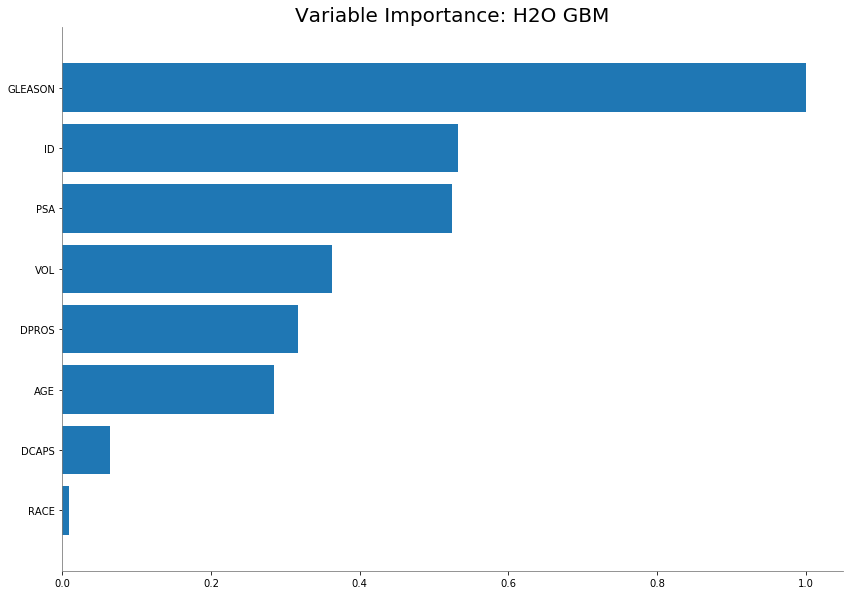

In [105]:
gbm_model_with_training_and_cv.varimp_plot()

In [106]:
#: Getting cross validation prediction details from the model with cross-validation 
#: (If cross validation prediction save is not set to TRUE, you will get error message)

In [107]:
gbm_model_with_training_and_cv.cross_validation_metrics_summary()

Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7287913,0.0403975,0.71875,0.7228916,0.6375,0.8148148,0.75
auc,0.7700940,0.0343016,0.7761486,0.7654762,0.74,0.8565051,0.7123404
err,0.2712087,0.0403975,0.28125,0.2771084,0.3625,0.1851852,0.25
err_count,20.6,3.481379,18.0,23.0,29.0,15.0,18.0
f0point5,0.6605104,0.0457309,0.698324,0.6595745,0.5555556,0.75,0.6390978
f1,0.7086272,0.0374964,0.7352941,0.7294118,0.6419753,0.7826087,0.6538461
f2,0.7679788,0.0383096,0.7763975,0.8157895,0.7602339,0.8181818,0.6692913
lift_top_group,2.5027723,0.1947544,2.064516,2.3714285,2.6666667,2.53125,2.88
logloss,0.5868385,0.0469577,0.6350344,0.6178322,0.5942904,0.4570368,0.6299987
max_per_class_error,0.3567103,0.0683767,0.3636364,0.3958333,0.5,0.2040816,0.32


In [108]:
#: Getting variable importance from a GBM mode (It will plot the coefficient table)

In [109]:
gbm_model_with_training_and_validtion.varimp()

[(u'GLEASON', 73.4897232055664, 1.0, 0.2549634365179395),
 (u'PSA', 63.44717025756836, 0.8633475197626356, 0.22012205054792125),
 (u'ID', 57.41383361816406, 0.7812498280550785, 0.19919014093997214),
 (u'VOL', 50.6388053894043, 0.689059683185318, 0.17568502479089132),
 (u'DPROS', 24.522401809692383, 0.3336847757760361, 0.08507741714557626),
 (u'AGE', 15.411602973937988, 0.2097109949758343, 0.05346863595463505),
 (u'DCAPS', 3.1581649780273438, 0.04297423966604533, 0.010956859827000466),
 (u'RACE', 0.15461984276771545, 0.002103965507329655, 0.0005364342760639789)]

In [110]:
#: Getting variable importance PLOT for GLM (Error)

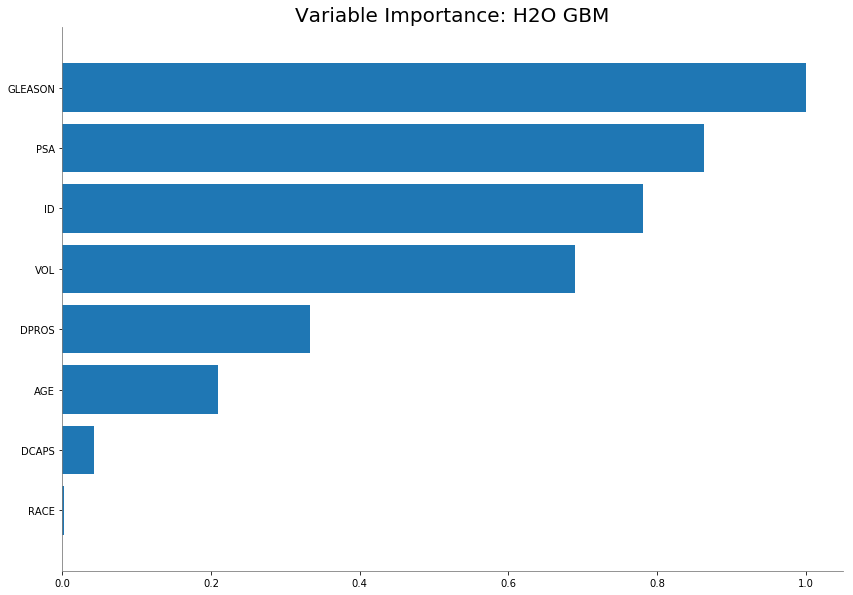

In [111]:
# - Positive ?
# - Negative ?
gbm_model_with_training_and_validtion.varimp_plot()

In [112]:
#: Building a GBM model with cross validation and saving cross validation predictions

In [113]:
gbm_model_with_training_and_cv = H2OGradientBoostingEstimator(keep_cross_validation_predictions = True, nfolds=5)
gbm_model_with_training_and_cv.train(x = features, y = response, training_frame= train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [114]:
#: Looking at cross validation predictions for all CV models

In [115]:
len(gbm_model_with_training_and_cv.cross_validation_predictions())

5

In [116]:
gbm_model_with_training_and_cv.cross_validation_predictions()[0]
gbm_model_with_training_and_cv.cross_validation_predictions()[1]

predict,p0,p1
0,0,0
0,0,0
0,0,0
0,0,0
0,0.970317,0.0296829
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0


In [117]:
#: Accessing H2O Model details from JSON

In [118]:
gbm_model_with_training_and_validtion._model_json

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,11398.0,5.0,5.0,5.0,7.0,20.0,13.2


Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_lift,validation_classification_error
,2017-11-13 22:27:52,0.001 sec,0.0,0.4914434,0.6760831,0.5,1.0,0.5921053,0.4789546,0.6515650,0.5,1.0,0.6578947
,2017-11-13 22:27:52,0.005 sec,1.0,0.4720114,0.6374387,0.8644041,2.4516129,0.2269737,0.4650639,0.6244840,0.78,2.9230769,0.2368421
,2017-11-13 22:27:52,0.009 sec,2.0,0.4554601,0.6056158,0.8869624,2.4516129,0.2171053,0.4488147,0.5937507,0.8246154,2.9230769,0.2105263
,2017-11-13 22:27:52,0.013 sec,3.0,0.4398059,0.5760860,0.8940412,2.4516129,0.2006579,0.4337890,0.5660393,0.8446154,2.9230769,0.1315789
,2017-11-13 22:27:52,0.016 sec,4.0,0.4278322,0.5539058,0.9040995,2.4516129,0.2039474,0.4218901,0.5441911,0.8876923,2.9230769,0.1578947
---,---,---,---,---,---,---,---,---,---,---,---,---,---
,2017-11-13 22:27:52,0.224 sec,46.0,0.2413698,0.2339888,0.9938620,2.4516129,0.0394737,0.3905465,0.4824366,0.8092308,2.9230769,0.2105263
,2017-11-13 22:27:52,0.230 sec,47.0,0.2398180,0.2316915,0.9942652,2.4516129,0.0361842,0.3930096,0.4865162,0.8030769,2.9230769,0.2105263
,2017-11-13 22:27:52,0.236 sec,48.0,0.2385228,0.2295585,0.9940860,2.4516129,0.0361842,0.3928504,0.4853373,0.8030769,2.9230769,0.2105263
,2017-11-13 22:27:52,0.242 sec,49.0,0.2372900,0.2277650,0.9944892,2.4516129,0.0361842,0.3919804,0.4835920,0.8030769,2.9230769,0.2105263



See the whole table with table.as_data_frame()

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0548119375726
RMSE: 0.234119494217
LogLoss: 0.223578775628
Mean Per-Class Error: 0.030017921147
AUC: 0.99520609319
Gini: 0.99041218638
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.433295291885: 


,0,1,Error,Rate
0,175.0,5.0,0.0278,(5.0/180.0)
1,4.0,120.0,0.0323,(4.0/124.0)
Total,179.0,125.0,0.0296,(9.0/304.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4332953,0.9638554,124.0
max f2,0.4332953,0.9661836,124.0
max f0point5,0.5733132,0.9692029,106.0
max accuracy,0.4332953,0.9703947,124.0
max precision,0.9792875,1.0,0.0
max recall,0.3123540,1.0,146.0
max specificity,0.9792875,1.0,0.0
max absolute_mcc,0.4332953,0.9388082,124.0
max min_per_class_accuracy,0.4332953,0.9677419,124.0
max mean_per_class_accuracy,0.4332953,0.9699821,124.0


Gains/Lift Table: Avg response rate: 40.79 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0131579,0.9628819,2.4516129,2.4516129,1.0,1.0,0.0322581,0.0322581,145.1612903,145.1612903
,2,0.0230263,0.9533590,2.4516129,2.4516129,1.0,1.0,0.0241935,0.0564516,145.1612903,145.1612903
,3,0.0328947,0.9502933,2.4516129,2.4516129,1.0,1.0,0.0241935,0.0806452,145.1612903,145.1612903
,4,0.0427632,0.9432361,2.4516129,2.4516129,1.0,1.0,0.0241935,0.1048387,145.1612903,145.1612903
,5,0.0526316,0.9418574,2.4516129,2.4516129,1.0,1.0,0.0241935,0.1290323,145.1612903,145.1612903
,6,0.1019737,0.9158052,2.4516129,2.4516129,1.0,1.0,0.1209677,0.25,145.1612903,145.1612903
,7,0.1513158,0.8692245,2.4516129,2.4516129,1.0,1.0,0.1209677,0.3709677,145.1612903,145.1612903
,8,0.2006579,0.8105281,2.4516129,2.4516129,1.0,1.0,0.1209677,0.4919355,145.1612903,145.1612903
,9,0.2993421,0.7075336,2.4516129,2.4516129,1.0,1.0,0.2419355,0.7338710,145.1612903,145.1612903
,10,0.4013158,0.4559975,2.1352758,2.3712322,0.8709677,0.9672131,0.2177419,0.9516129,113.5275754,137.1232152




ModelMetricsBinomial: gbm
** Reported on validation data. **

MSE: 0.152755729065
RMSE: 0.390839774159
LogLoss: 0.481813619133
Mean Per-Class Error: 0.196923076923
AUC: 0.809230769231
Gini: 0.618461538462
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.420686001908: 


,0,1,Error,Rate
0,19.0,6.0,0.24,(6.0/25.0)
1,2.0,11.0,0.1538,(2.0/13.0)
Total,21.0,17.0,0.2105,(8.0/38.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4206860,0.7333333,16.0
max f2,0.4206860,0.7971014,16.0
max f0point5,0.6842872,0.8108108,5.0
max accuracy,0.6842872,0.8157895,5.0
max precision,0.9709371,1.0,0.0
max recall,0.0246933,1.0,36.0
max specificity,0.9709371,1.0,0.0
max absolute_mcc,0.6842872,0.6004806,5.0
max min_per_class_accuracy,0.4559573,0.7692308,14.0
max mean_per_class_accuracy,0.4206860,0.8030769,16.0


Gains/Lift Table: Avg response rate: 34.21 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0263158,0.9671841,2.9230769,2.9230769,1.0,1.0,0.0769231,0.0769231,192.3076923,192.3076923
,2,0.0263158,0.9634310,0.0,2.9230769,0.0,1.0,0.0,0.0769231,-100.0,192.3076923
,3,0.0526316,0.9515437,2.9230769,2.9230769,1.0,1.0,0.0769231,0.1538462,192.3076923,192.3076923
,4,0.0526316,0.9204302,0.0,2.9230769,0.0,1.0,0.0,0.1538462,-100.0,192.3076923
,5,0.0526316,0.8893168,0.0,2.9230769,0.0,1.0,0.0,0.1538462,-100.0,192.3076923
,6,0.1052632,0.7978554,2.9230769,2.9230769,1.0,1.0,0.1538462,0.3076923,192.3076923,192.3076923
,7,0.1578947,0.6665591,2.9230769,2.9230769,1.0,1.0,0.1538462,0.4615385,192.3076923,192.3076923
,8,0.2105263,0.6062020,0.0,2.1923077,0.0,0.75,0.0,0.4615385,-100.0,119.2307692
,9,0.3157895,0.4972917,0.7307692,1.7051282,0.25,0.5833333,0.0769231,0.5384615,-26.9230769,70.5128205
,10,0.3947368,0.4406607,2.9230769,1.9487179,1.0,0.6666667,0.2307692,0.7692308,192.3076923,94.8717949



Variable Importances: 


variable,relative_importance,scaled_importance,percentage
GLEASON,73.4897232,1.0,0.2549634
PSA,63.4471703,0.8633475,0.2201221
ID,57.4138336,0.7812498,0.1991901
VOL,50.6388054,0.6890597,0.1756850
DPROS,24.5224018,0.3336848,0.0850774
AGE,15.4116030,0.2097110,0.0534686
DCAPS,3.1581650,0.0429742,0.0109569
RACE,0.1546198,0.0021040,0.0005364


{u'__meta': {u'schema_name': u'GBMModelV3',
  u'schema_type': u'GBMModel',
  u'schema_version': 3},
 u'algo': u'gbm',
 u'algo_full_name': u'Gradient Boosting Machine',
 u'compatible_frames': None,
 u'data_frame': {u'URL': u'/3/Frames/py_25_sid_8795',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'py_25_sid_8795',
  u'type': u'Key<Frame>'},
 u'model_id': {u'URL': u'/3/Models/glm_model_with_training_and_validtion_python',
  u'__meta': {u'schema_name': u'ModelKeyV3',
   u'schema_type': u'Key<Model>',
   u'schema_version': 3},
  u'name': u'glm_model_with_training_and_validtion_python',
  u'type': u'Key<Model>'},
 u'output': {u'__meta': {u'schema_name': u'GBMModelOutputV3',
   u'schema_type': u'GBMOutput',
   u'schema_version': 3},
  u'cross_validation_fold_assignment_frame_id': None,
  u'cross_validation_holdout_predictions_frame_id': None,
  u'cross_validation_metrics': None,
  u'cross_validation_metrics_summary': None

In [119]:
gbm_model_with_training_and_validtion._model_json['output']['coefficients_table']
## GBM model does not have coefficients table

KeyError: 'coefficients_table'

In [120]:
gbm_model_with_training_and_validtion._model_json['output']['names']

[u'ID',
 u'AGE',
 u'RACE',
 u'DPROS',
 u'DCAPS',
 u'PSA',
 u'VOL',
 u'GLEASON',
 u'CAPSULE']

In [121]:
gbm_model_with_training_and_validtion._model_json['output']['cross_validation_predictions']

In [122]:
gbm_model_with_training_and_cv._model_json['output']['cross_validation_predictions']

[{u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_2496_cv_1',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GBM_model_python_1510608322538_2496_cv_1',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_2496_cv_2',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GBM_model_python_1510608322538_2496_cv_2',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_2496_cv_3',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version': 3},
  u'name': u'prediction_GBM_model_python_1510608322538_2496_cv_3',
  u'type': u'Key<Frame>'},
 {u'URL': u'/3/Frames/prediction_GBM_model_python_1510608322538_2496_cv_4',
  u'__meta': {u'schema_name': u'FrameKeyV3',
   u'schema_type': u'Key<Frame>',
   u'schema_version'

In [123]:
gbm_model_with_training_and_cv._model_json['output']['training_metrics']


ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.0637863025683
RMSE: 0.252559503025
LogLoss: 0.244491796997
Mean Per-Class Error: 0.0581900895454
AUC: 0.98825256975
Gini: 0.976505139501
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.369290229047: 


,0,1,Error,Rate
0,208.0,19.0,0.0837,(19.0/227.0)
1,5.0,148.0,0.0327,(5.0/153.0)
Total,213.0,167.0,0.0632,(24.0/380.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3692902,0.925,166.0
max f2,0.3284870,0.9554140,172.0
max f0point5,0.5709882,0.9471366,131.0
max accuracy,0.4617671,0.9368421,150.0
max precision,0.9740913,1.0,0.0
max recall,0.2716047,1.0,200.0
max specificity,0.9740913,1.0,0.0
max absolute_mcc,0.3692902,0.8731243,166.0
max min_per_class_accuracy,0.4303894,0.9295154,158.0
max mean_per_class_accuracy,0.3692902,0.9418099,166.0


Gains/Lift Table: Avg response rate: 40.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0105263,0.9656726,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0261438,148.3660131,148.3660131
,2,0.0210526,0.9589343,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0522876,148.3660131,148.3660131
,3,0.0315789,0.9507825,2.4836601,2.4836601,1.0,1.0,0.0261438,0.0784314,148.3660131,148.3660131
,4,0.0421053,0.9422672,2.4836601,2.4836601,1.0,1.0,0.0261438,0.1045752,148.3660131,148.3660131
,5,0.05,0.9301226,2.4836601,2.4836601,1.0,1.0,0.0196078,0.1241830,148.3660131,148.3660131
,6,0.1,0.9044146,2.4836601,2.4836601,1.0,1.0,0.1241830,0.2483660,148.3660131,148.3660131
,7,0.15,0.8446853,2.4836601,2.4836601,1.0,1.0,0.1241830,0.3725490,148.3660131,148.3660131
,8,0.2,0.7961432,2.4836601,2.4836601,1.0,1.0,0.1241830,0.4967320,148.3660131,148.3660131
,9,0.3,0.6723258,2.4836601,2.4836601,1.0,1.0,0.2483660,0.7450980,148.3660131,148.3660131
,10,0.4,0.4587689,1.6993464,2.2875817,0.6842105,0.9210526,0.1699346,0.9150327,69.9346405,128.7581699


In [124]:
gbm_model_with_training_and_cv._model_json['output']['training_metrics']['MSE']

0.06378630256832155

In [125]:
gbm_model_with_training_and_cv._model_json['output']['training_metrics']['R^2']

In [126]:
#: Plotting GBM Model scoring plot

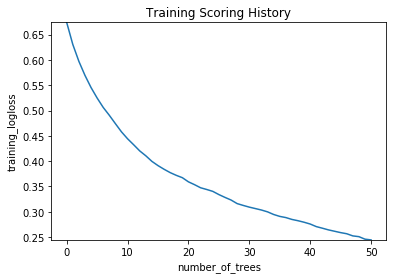

In [127]:
gbm_model_with_training_and_cv.plot()